# Producción de Miel (EUA)

Los datos siguientes se obtuvieron de [Kaggle](https://www.kaggle.com/datasets/jessicali9530/honey-production). 
Existe una preocupación mundial sobre la rápida disminución de la población de abejas. 

Debido a que se encontró un comportamiento linealmente descendente de la producción de miel de 1998 a 2012, se hará una predicción para los años 2013 a 2050 mediante regresión lineal. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import linear_model

In [2]:
df = pd.read_csv('honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


* state - estado
* numcol - número de colonias productoras de miel
* yieldpercol - rendimiento de miel por colonia (lbs)
* totalprod - producción total (numcol x yieldpercol) (lbs)
* stocks -se refiere a las existencias en poder de los productores
* priceperlb - Se refiere al precio promedio por libra basado en ventas ampliadas
* prodvalue - valor de la producción (totalprod x priceperlb) (USD)
* year - año

In [3]:
print(df.shape)

(626, 8)


Nos interesa la producción promedio por año, agrupamos por la variable `year` y calculamos el promedio en la variable `prod_per_year`.

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


In [5]:
x = prod_per_year['year']
X = x.values.reshape(-1,1)
y = prod_per_year['totalprod']

Se realiza un gráfico de dispersión para la producción de miel por año y se observa una vaga relación lineal entre la variable `X` e `y`. 

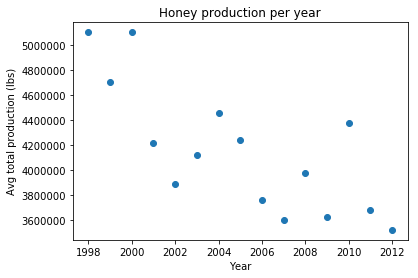

In [6]:
plt.scatter(X,y)
plt.title('Honey production per year')
plt.xlabel('Year')
plt.ylabel('Avg total production (lbs)')
plt.show()

Se creó un modelo de regresión lineal de scikit-learn llamado line_fitter y se ajustó a las variables `X`e `y`. Se obtuvo un R^2 de 0.58, la pendiente de la recta es aproximadamente -88303.2 con intersección en 181208083.1.

In [10]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(X,y)
print(line_fitter.coef_, line_fitter.intercept_)
print(line_fitter.score(X,y))

[-88303.18915238] 181208083.1073298
0.5845502894391804


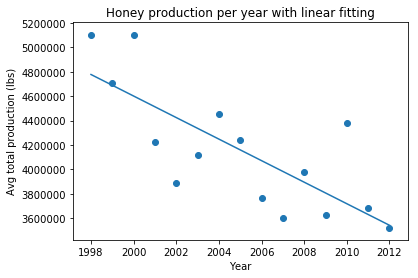

In [35]:
y_predict = line_fitter.predict(X)
plt.plot(X, y_predict)
plt.scatter(X, y)
plt.title('Honey production per year with linear fitting')
plt.xlabel('Year')
plt.ylabel('Avg total production (lbs)')
plt.show()

Ahora, se crea la variable `x_future` para hacer la predicción para los años 2013-2050 y se grafica la producción de miel para cada uno de estos años. 

In [32]:
x_future = np.array(range(2013, 2051))
X_future = x_future.reshape(-1,1)
y_future = line_fitter.predict(X_future)

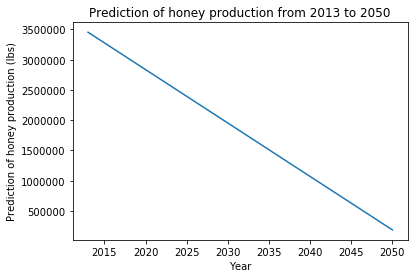

In [36]:
plt.plot(x_future, y_future)
plt.title('Prediction of honey production from 2013 to 2050')
plt.xlabel('Year')
plt.ylabel('Prediction of honey production (lbs)')
plt.show()

Se observa que para el 2050, la producción de miel decae a cerca de las 500000 lbs, es decir a solo el 10% de lo que se producía en 1998.